In [10]:
# !pip install fastai fastcore --upgrade

In [11]:
# !pip install fastai fastcore --upgrade

In [12]:
import fastai

In [13]:
fastai.__version__

'2.7.14'

In [14]:
from fastai.collab import *

In [15]:
from fastai.tabular.all import *

# Book-Crossing Dataset

> Add blockquote



In [16]:
!unzip BX-CSV-Dump.zip

Archive:  BX-CSV-Dump.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


In [17]:
path = Path('.')
path.ls()

(#6) [Path('.config'),Path('Users.csv'),Path('BX-CSV-Dump.zip'),Path('Ratings.csv'),Path('Books.csv'),Path('sample_data')]

In [18]:
# first read user info into a dataframe
users = pd.read_csv(path/'Users.csv')
users.head()

User-ID;Age
0          1;
1        2;18
2          3;
3        4;17
4          5;

In [19]:
#lets inspect the contents to see what went wrong
with open(path/'Users.csv', encoding='latin-1') as f:
  lines = f.readlines()
lines[:5]

['User-ID;Age\n', '1;\n', '2;18\n', '3;\n', '4;17\n']

In [20]:
users = pd.read_csv(path/'Users.csv', delimiter=';', encoding='latin-1')
users.head()

<ipython-input-20-ab5f420e0214>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv(path/'Users.csv', delimiter=';', encoding='latin-1')


User-ID  Age
0       1  NaN
1       2   18
2       3  NaN
3       4   17
4       5  NaN

In [21]:
# read book info into a dataframe
books = pd.read_csv(path/'Books.csv', delimiter=';', encoding='latin-1')
books.head()

ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                                Title  \
0                                                                                 Classical Mythology   
1                                                                                        Clara Callan   
2                                                                                Decision in Normandy   
3  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It   
4                                                                              The Mummies of Urumchi   

                 Author  Year                Publisher  
0    Mark P. O. Morford  2002  Oxford University Press  
1  Richard Bruce Wright  2001    HarperFlamingo Canada  
2          Carlo D'Este  1991          HarperPerennial  
3      Gina Bari Kolata  1999     Farrar Straus Giroux  
4       E. J. W. Barber  1999   W. W. Norton & Company

In [22]:
#lets inspect the contents to see what went wrong
with open(path/'Books.csv', encoding='latin-1') as f:
  lines = f.readlines()
lines[:5]

['ISBN;Title;Author;Year;Publisher\n',
 '0195153448;Classical Mythology;Mark P. O. Morford;2002;Oxford University Press\n',
 '0002005018;Clara Callan;Richard Bruce Wright;2001;HarperFlamingo Canada\n',
 "0060973129;Decision in Normandy;Carlo D'Este;1991;HarperPerennial\n",
 '0374157065;Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It;Gina Bari Kolata;1999;Farrar Straus Giroux\n']

In [23]:
lines[0].split(";"), lines[6451].split(";"), lines[6452].split(";"),  lines[6451]

(['ISBN', 'Title', 'Author', 'Year', 'Publisher\n'],
 ['0735201994',
  '"Peterman Rides Again: Adventures Continue with the Real \\""J. Peterman\\"" Through Life & the Catalog Business"',
  'John Peterman',
  '2000',
  'Prentice Hall Art\n'],
 ['1414011458', 'No More Bobs', 'Cynthia Borris', '2003', 'Authorhouse\n'],
 '0735201994;"Peterman Rides Again: Adventures Continue with the Real \\""J. Peterman\\"" Through Life & the Catalog Business";John Peterman;2000;Prentice Hall Art\n')

In [24]:
with open(path/'Books.csv', encoding='latin-1') as f:
  lines = f.read()

import html
lines = html.unescape(lines)
with open(path/'Books_fixed.csv','w') as f:
  f.write(lines)



In [25]:
# read book info into a dataframe
books = pd.read_csv(path/'Books_fixed.csv', delimiter=';', encoding='latin-1')
books.head()

ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                                Title  \
0                                                                                 Classical Mythology   
1                                                                                        Clara Callan   
2                                                                                Decision in Normandy   
3  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It   
4                                                                              The Mummies of Urumchi   

                 Author  Year                Publisher  
0    Mark P. O. Morford  2002  Oxford University Press  
1  Richard Bruce Wright  2001    HarperFlamingo Canada  
2          Carlo D'Este  1991          HarperPerennial  
3      Gina Bari Kolata  1999     Farrar Straus Giroux  
4       E. J. W. Barber  1999   W. W. Norton & Company

In [26]:
# #lets inspect the contents to see what went wrong
# with open(path/'Books.csv', encoding='latin-1') as f:
#   lines = f.readlines()

# lines[43666].split(';'),lines[43666]

In [27]:
# with open(path/'Books.csv', encoding='latin-1') as f:
#   lines = f.read()

# lines = lines.replace('";"','"<>"')
# with open(path/'Books_fixed.csv','w') as f:
#   f.write(lines)



In [28]:
# read book info into a dataframe
books = pd.read_csv(path/'Books_fixed.csv', delimiter=';', encoding='latin-1', engine='python')
books.head()

ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                                Title  \
0                                                                                 Classical Mythology   
1                                                                                        Clara Callan   
2                                                                                Decision in Normandy   
3  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It   
4                                                                              The Mummies of Urumchi   

                 Author  Year                Publisher  
0    Mark P. O. Morford  2002  Oxford University Press  
1  Richard Bruce Wright  2001    HarperFlamingo Canada  
2          Carlo D'Este  1991          HarperPerennial  
3      Gina Bari Kolata  1999     Farrar Straus Giroux  
4       E. J. W. Barber  1999   W. W. Norton & Company

In [29]:
books[['ISBN','Title']].head()

ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                                Title  
0                                                                                 Classical Mythology  
1                                                                                        Clara Callan  
2                                                                                Decision in Normandy  
3  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It  
4                                                                              The Mummies of Urumchi

In [30]:
#books = books['"ISBN"'].str.replace(r"[\"\',]", '')
books_cleaned = books.replace('\"','', regex=True)
books_cleaned.head()


ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                                Title  \
0                                                                                 Classical Mythology   
1                                                                                        Clara Callan   
2                                                                                Decision in Normandy   
3  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It   
4                                                                              The Mummies of Urumchi   

                 Author  Year                Publisher  
0    Mark P. O. Morford  2002  Oxford University Press  
1  Richard Bruce Wright  2001    HarperFlamingo Canada  
2          Carlo D'Este  1991          HarperPerennial  
3      Gina Bari Kolata  1999     Farrar Straus Giroux  
4       E. J. W. Barber  1999   W. W. Norton & Company

In [31]:
books_cleaned.columns = [x.replace("\"", '') for x in books_cleaned.columns]
books_cleaned.head()

ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                                Title  \
0                                                                                 Classical Mythology   
1                                                                                        Clara Callan   
2                                                                                Decision in Normandy   
3  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It   
4                                                                              The Mummies of Urumchi   

                 Author  Year                Publisher  
0    Mark P. O. Morford  2002  Oxford University Press  
1  Richard Bruce Wright  2001    HarperFlamingo Canada  
2          Carlo D'Este  1991          HarperPerennial  
3      Gina Bari Kolata  1999     Farrar Straus Giroux  
4       E. J. W. Barber  1999   W. W. Norton & Company

In [32]:
# read the ratings
ratings = pd.read_csv(path/'Ratings.csv', delimiter=';', encoding='latin-1')
ratings.head()

User-ID        ISBN  Rating
0   276725  034545104X       0
1   276726  0155061224       5
2   276727  0446520802       0
3   276729  052165615X       3
4   276729  0521795028       6

In [33]:
# users.head()

In [34]:
books_cleaned.head()


ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                                Title  \
0                                                                                 Classical Mythology   
1                                                                                        Clara Callan   
2                                                                                Decision in Normandy   
3  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It   
4                                                                              The Mummies of Urumchi   

                 Author  Year                Publisher  
0    Mark P. O. Morford  2002  Oxford University Press  
1  Richard Bruce Wright  2001    HarperFlamingo Canada  
2          Carlo D'Este  1991          HarperPerennial  
3      Gina Bari Kolata  1999     Farrar Straus Giroux  
4       E. J. W. Barber  1999   W. W. Norton & Company

In [35]:
ratings_with_titles = ratings.merge(books_cleaned[['ISBN','Title']])
ratings_with_titles.head()

User-ID        ISBN  Rating                 Title
0   276725  034545104X       0  Flesh Tones: A Novel
1     2313  034545104X       5  Flesh Tones: A Novel
2     6543  034545104X       0  Flesh Tones: A Novel
3     8680  034545104X       5  Flesh Tones: A Novel
4    10314  034545104X       9  Flesh Tones: A Novel

In [36]:
# look at a few titles after merging
ratings_with_titles[ratings_with_titles.ISBN=='0155061224']

User-ID        ISBN  Rating             Title
60   276726  0155061224       5  Rites of Passage
61   159181  0155061224       0  Rites of Passage

In [37]:
#verify the title's correctness
books_cleaned[books_cleaned.ISBN=='0155061224']

ISBN             Title      Author  Year Publisher
225829  0155061224  Rites of Passage  Judith Rae  2001    Heinle

# Loading the Book-Crossing dataset into a FastAI dataloaders object

In [38]:
len(ratings_with_titles)

1031187

In [39]:
ratings_with_titles_subset = ratings_with_titles.sample(frac = 0.05)
len(ratings_with_titles_subset)

51559

In [40]:
# create a dataloader from a colab filtering dataset (dataframe)
dls = CollabDataLoaders.from_df(ratings_with_titles_subset, user_name = 'User-ID', item_name='Title', bs = 1024)

In [41]:
dls.show_batch()

In [42]:
len(dls[0].dataset),len(dls[1].dataset)

(41248, 10311)

In [43]:
dls.train.y.min(), dls.train.y.max()

(0, 10)

# Experiment

In [44]:
embs = get_emb_sz(dls)
embs

[(13685, 331), (32791, 541)]

In [55]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(-0.5,10.5), n_act=5, dropout_p=0.5):
        super(CollabNN, self).__init__()
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(n_act, n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        self.y_range = y_range

    def forward(self, x):
        embs = self.user_factors(x[:,0]),self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)


model = CollabNN(*embs)

learn = Learner(dls, model, loss_func=MSELossFlat(), cbs=ShowGraphCallback())



SuggestedLRs(valley=0.007585775572806597)

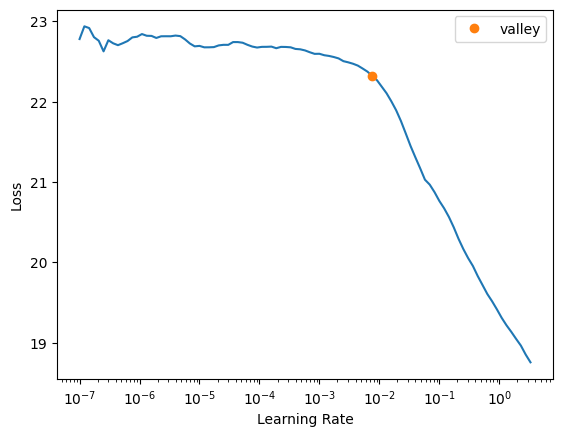

In [56]:
learn.lr_find()

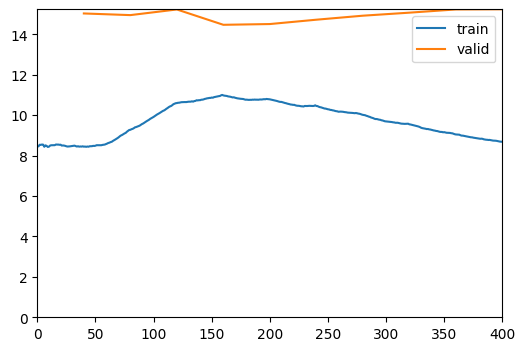

In [59]:
learn.fit_one_cycle(10, 0.00902, wd=0.5)

## Solution